In [239]:
## import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [240]:
def read_data(ticker):
    df = pd.read_csv(ticker)
    df.columns = ['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Change %']
    df['Price'] = df['Price'].str.replace(',','')
    df['Price'] = pd.to_numeric(df['Price'], downcast='float')
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values("Date", ascending= True)
    df = df.set_index("Date")
    return df

In [241]:
vcb = 'VCB Historical Data.csv'
fpt = 'FPT Historical Data.csv'
pnj = 'PNJ Historical Data.csv'

In [242]:
df_vcb = read_data(vcb)
df_fpt = read_data(fpt)
df_pnj = read_data(pnj)

In [243]:
def change_type_volume(series):
    volume = []
    for number in  series:
        if "M" in number:
            number = number[:-1]
            number = float(number)*pow(10,6)
            volume.append(number) 
        elif "K" in number:
            number = number[:-1] 
            number = float(number)*pow(10,3)    
            volume.append(number)        
    return volume
                       

In [244]:

df_vcb['Volume'] = change_type_volume(df_vcb['Volume'])
df_pnj['Volume'] = change_type_volume(df_pnj['Volume'])
df_fpt['Volume'] = change_type_volume(df_fpt['Volume'])


In [245]:
df_vcb

,Price,Open,High,Low,Volume,Change %
Date,,,,,,
2019-01-02,41161.0,"41,391","41,698","41,084",1380000.0,0.19%
2019-01-03,41161.0,"41,468","41,545","40,470",1370000.0,0.00%
2019-01-04,41775.0,"40,931","41,775","40,393",1670000.0,1.49%
2019-01-07,41929.0,"42,466","42,620","41,852",1500000.0,0.37%
2019-01-08,42236.0,"42,236","42,390","41,852",1680000.0,0.73%
...,...,...,...,...,...,...
2023-05-05,89800.0,"88,500","89,900","88,200",225700.0,1.47%
2023-05-08,93000.0,"90,000","93,200","89,800",1500000.0,3.56%
2023-05-09,92300.0,"93,000","93,900","92,300",563400.0,-0.75%


### Data Visualization

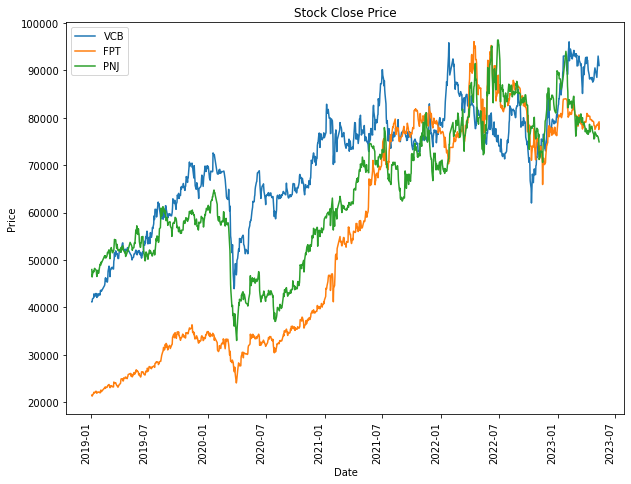

In [246]:
## Plot Stock open price
df_vcb['Price'].plot(figsize=(10,8) , title="Stock Close Price", label = "VCB", xlabel='Datetime', ylabel='Price') 
df_fpt['Price'].plot(label = "FPT")
df_pnj['Price'].plot(label = "PNJ")
plt.xticks(rotation ='vertical')
plt.legend()

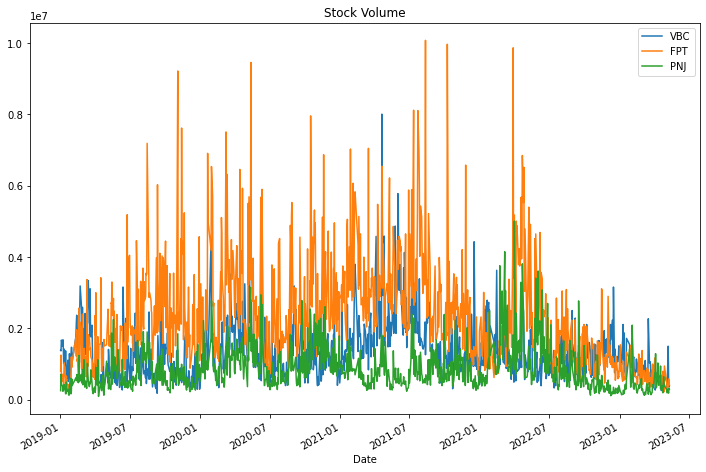

In [247]:
## Plot Volume
df_vcb['Volume'].plot(figsize = (12,8), title ="Stock Volume", label = "VBC")
df_fpt['Volume'].plot(label = "FPT")
df_pnj['Volume'].plot(label = 'PNJ')
plt.legend()

In [248]:
## giá đóng cửa thấp/cao nhất của từng cổ phiếu
max_vcb = df_vcb['Price'].max()
max_fpt = df_fpt['Price'].max()
max_pnj = df_pnj['Price'].max()

min_vcb = df_vcb['Price'].min()
min_fpt = df_fpt['Price'].min()
min_pnj = df_pnj['Price'].min()

data = [['VCB', max_vcb, min_vcb], ['FPT', max_fpt, min_fpt], ['PNJ', max_pnj, min_pnj]]
df = pd.DataFrame(data, columns=['Name', 'Max_Price', 'Min_Price'])
df


,Name,Max_Price,Min_Price
0,VCB,96000.000000,41161.000000
1,FPT,96049.796875,21270.300781
2,PNJ,96375.000000,33005.101562


In [249]:
## Tỷ suất sinh lời cho từng cổ phiếu từ ( 2019 - now)
ret_fpt = max_fpt/min_fpt - 1
ret_vcb = max_vcb/min_vcb - 1
ret_pnj = max_pnj/min_pnj - 1
df['Ret'] = [ret_vcb, ret_fpt, ret_pnj]
df

,Name,Max_Price,Min_Price,Ret
0,VCB,96000.000000,41161.000000,1.332305
1,FPT,96049.796875,21270.300781,3.515676
2,PNJ,96375.000000,33005.101562,1.920003


In [250]:
### check ngày có giá mở cửa cao nhất
df['Datime_Max_Price'] = [df_vcb['Price'].idxmax(),df_fpt['Price'].idxmax(),df_pnj['Price'].idxmax()]
df['Datime_Min_Price'] = [df_vcb['Price'].idxmin(),df_fpt['Price'].idxmin(),df_pnj['Price'].idxmin()]
df

,Name,Max_Price,Min_Price,Ret,Datime_Max_Price,Datime_Min_Price
0,VCB,96000.000000,41161.000000,1.332305,2023-02-06,2019-01-02
1,FPT,96049.796875,21270.300781,3.515676,2022-04-14,2019-01-03
2,PNJ,96375.000000,33005.101562,1.920003,2022-06-27,2020-03-31


In [251]:
### Check khối lượng giao dịch lớn nhất cho từng cổ phiếu
df['volume_Max'] = [df_vcb['Volume'].max(), df_fpt['Volume'].max(), df_pnj['Volume'].max()]
df['volume_Min'] = [df_vcb['Volume'].min(), df_fpt['Volume'].min(), df_pnj['Volume'].min()]
df

,Name,Max_Price,Min_Price,Ret,Datime_Max_Price,Datime_Min_Price,volume_Max,volume_Min
0,VCB,96000.000000,41161.000000,1.332305,2023-02-06,2019-01-02,8010000.0,180490.0
1,FPT,96049.796875,21270.300781,3.515676,2022-04-14,2019-01-03,10080000.0,221000.0
2,PNJ,96375.000000,33005.101562,1.920003,2022-06-27,2020-03-31,5010000.0,92070.0


In [252]:
df2 = df_vcb['2023-02-06':]
df2

,Price,Open,High,Low,Volume,Change %
Date,,,,,,
2023-02-06,96000.0,"92,600","96,300","91,500",1150000.0,3.23%
2023-02-07,92000.0,"95,300","95,500","92,000",1200000.0,-4.17%
2023-02-08,94200.0,"92,100","96,200","92,100",884800.0,2.39%
2023-02-09,93000.0,"93,800","95,000","93,000",759400.0,-1.27%
2023-02-10,94500.0,"94,500","94,500","92,800",647700.0,1.61%
...,...,...,...,...,...,...
2023-05-05,89800.0,"88,500","89,900","88,200",225700.0,1.47%
2023-05-08,93000.0,"90,000","93,200","89,800",1500000.0,3.56%
2023-05-09,92300.0,"93,000","93,900","92,300",563400.0,-0.75%


In [253]:
## Gía trị giao dịch cho từng cổ phiếu
df_fpt['Trading Value'] = df_fpt['Price']*df_fpt['Volume']
df_vcb['Trading Value'] = df_vcb['Price']*df_vcb['Volume']
df_pnj['Trading Value'] = df_pnj['Price']*df_pnj['Volume']
df_fpt

,Price,Open,High,Low,Volume,Change %,Trading Value
Date,,,,,,,
2019-01-02,21478.800781,"21,791.6","21,974.0","21,452.7",801490.0,-2.37%,1.721504e+10
2019-01-03,21270.300781,"21,609.1","21,609.1","21,218.1",1250000.0,-0.97%,2.658788e+10
2019-01-04,21426.699219,"21,166.0","21,609.1","21,113.9",556130.0,0.74%,1.191603e+10
2019-01-07,21791.599609,"21,791.6","21,948.0","21,687.3",713070.0,1.70%,1.553894e+10
2019-01-08,21895.800781,"21,791.6","21,895.8","21,739.4",516130.0,0.48%,1.130108e+10
...,...,...,...,...,...,...,...
2023-05-05,78400.000000,"78,600.0","78,600.0","78,200.0",319200.0,-0.13%,2.502528e+10
2023-05-08,78500.000000,"78,500.0","78,900.0","78,400.0",362900.0,0.13%,2.848765e+10
2023-05-09,78900.000000,"78,000.0","79,800.0","78,000.0",580900.0,0.51%,4.583301e+10


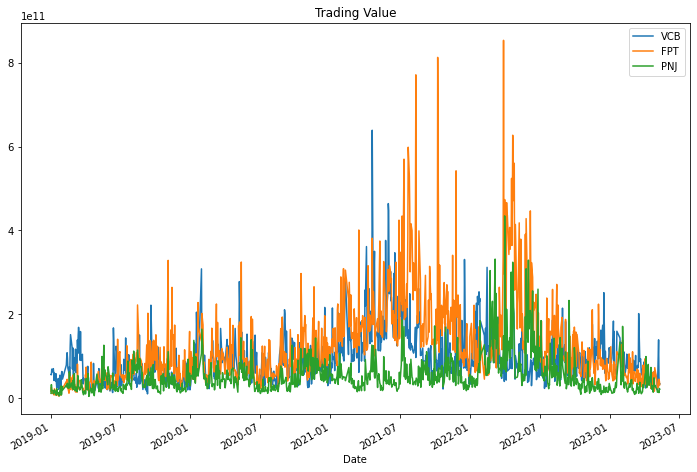

In [255]:
df_vcb['Trading Value'].plot(figsize=(12,8), title= 'Trading Value', label = 'VCB')
df_fpt['Trading Value'].plot(label = 'FPT')
df_pnj['Trading Value'].plot(label = 'PNJ')
plt.legend()